# Wordclouds

Wordclouds, auch Wortwolken genannt, sind visuelle Darstellungen von Textdaten, bei denen die Häufigkeit der Wörter durch ihre Schriftgröße innerhalb der Wolke dargestellt wird. Je öfter ein Wort im Text vorkommt, desto größer und auffälliger erscheint es in der Wordcloud, wodurch ein schneller visueller Eindruck von den Schlüsselthemen oder -begriffen eines Textes vermittelt wird. Diese Art der Darstellung eignet sich besonders gut für die Analyse von großen Textmengen, um dominante Themen oder Stimmungen zu identifizieren. Wordclouds sind intuitiv verständlich und können effektiv eingesetzt werden, um komplexe Datenmengen auf eine zugängliche und ästhetisch ansprechende Weise zu präsentieren.

Das Python-Paket [WordCloud](https://amueller.github.io/word_cloud/) bietet einen einfachen Einstieg, um mit Python Wordclouds zu generieren. Was hier im Bereich besonderer Layouts machbar ist, zeigt die [Galerie](https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery).


## Import

Bevor wir loslegen können, müssten die entsprechenden Bibliotheken importiert und die Datengrundlage eingelesen werden. Das Python-Pakete stopword-iso wird uns bei der Entfernung von Stoppwörtern helfen.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import stopwordsiso as stopwords

from wordcloud import WordCloud

%matplotlib inline

## Einlesen der Daten

In [3]:
df = pd.read_json('240301-AvH-letters-with-tokens.json')
df.loc[:, 'date'] = pd.to_datetime(df.loc[:, 'date'], unit='ms')
print(df.shape)
df.head(3)

(296, 12)


,reference,edition_id,sender_id,sender,receiver_id,receiver,date,place_id,place,text,token,nr_token
0,https://edition-humboldt.de/H0002655,#AVHR,http://d-nb.info/gnd/118554700,Alexander von Humboldt,http://d-nb.info/gnd/118805193,Samuel Thomas von Soemmerring,1793-12-05,http://sws.geonames.org/6556797,Berg,"Berg , den 5 . Dez Dezember 1793 Ihr Brief, li...","[berg, den, 5, dez, dezember, 1793, ihr, brief...",252
1,https://edition-humboldt.de/H0002730,#AVHR,http://d-nb.info/gnd/118554700,Alexander von Humboldt,http://d-nb.info/gnd/118805193,Samuel Thomas von Soemmerring,1794-02-06,http://sws.geonames.org/2951825,Bayreuth,"Der Ueberbringer dieses Briefchens, lieber Soe...","[der, ueberbringer, dieses, briefchens, lieber...",143
2,https://edition-humboldt.de/H0002729,#AVHR,http://d-nb.info/gnd/118554700,Alexander von Humboldt,http://d-nb.info/gnd/118805193,Samuel Thomas von Soemmerring,1795-06-07,http://sws.geonames.org/2951825,Bayreuth,"Verehrungswerther Freund, Ich will Ihnen ein B...","[verehrungswerther, freund, ich, will, ihnen, ...",591


Nach dem Einlesen und dem obligatorischen Check der Daten, müssen wir die uns vorliegenden textuellen Daten in das Format bringen, welches das Python-Paket WordCloud erwartet. In diesem Fall benötigen wir alle darzustellenden Wörter in einem einzigen String. Dazu holen wir aus unserem Dataframe alle Texte aus der Spalte `text` als Liste heraus. Dadurch liegen zwar die einzelnen Elemente dieser Liste als String vor, aber wir benötigen einen einzigen String - daher nutzen wir `' '.join()`, um aus den einzelnen Strings in der Liste einen langen String zu erstellen. Wir normalisieren die Wörter in Kleinschrift mit `lower()`, damit die Worhäufigkeiten besser ermitteln werden. 

Wichtig! Wir haben die Texte nicht noch weitergehend durch Lemmatisierung normalisiert, sodass wir bei der Zählung der Worthäufigkeiten doch starke Ungenauigkeiten vorliegen haben. Wie die Wörter von Texten lemmatisiert, also auf ihre Grundform gebracht werden können, demonstrieren wir im nächsten JupyterBook Python advanced. Hier geht es uns vor allem um Vorgehensweise bei der Erstellung von Wordclouds mit Python.

In [4]:
words = ' '.join(df.loc[:, 'text'].to_list()).lower()

Würden wir nun direkt unsere Wordcloud generieren, die ja auf der Auszählung von Häufigkeiten beruht, dann würden wir in der Visualisierung vor allem Artikel und Konjuktionen sehen. Das liegt daran, dass diese Wörter, auch als Stoppwörter bezeichnet, sehr häufig vorkommen, aber wenig inhaltliche Aussagekraft besitzen. Diese Stoppwörter möchten wir also gerne filtern, was mit dem Python-Paket auch leicht möglich ist. Allerdings müssen wir eine Liste mit Stoppwörtern übergeben. Diese Liste mit Stoppwörtern erstellen wir in der nächsten Codezelle. Die Stoppwörter können wir über das Paket [stopwords-iso](https://github.com/stopwords-iso/stopwords-iso) erhalten, hier können wir auch einsehen, welche Stoppwörter in der jeweiligen Liste enhalten sind. Die Stoppwortlisten können aber auch über andere Quellen bezogen werden bzw. können auch noch selbst angepasst werden.

In [5]:
stop_words = stopwords.stopwords('de')

Nun erstellen wir das WordCloud-Objekt, das später die Wordcloud generiert. Verschiedene Parameter können hier eingestellt werden: Größe der Visualisierung, Hintergrundfarbe, Farbe der Schrift, die zu nutzenden Stoppwörter sowie die Anzahl der Wörter, die dargestellt werden sollen.

In [6]:
wc = WordCloud(width=1500, height=1000,
            random_state=42,
            background_color='black',
            colormap='Set1',
            stopwords=stop_words,
            collocations=False,  # Bigrams werden nicht dargestellt
            max_words=100)

Dann generieren wir die Wordcloud und nutzen Matplotlib, um ein wenig das Layout anzupassen.

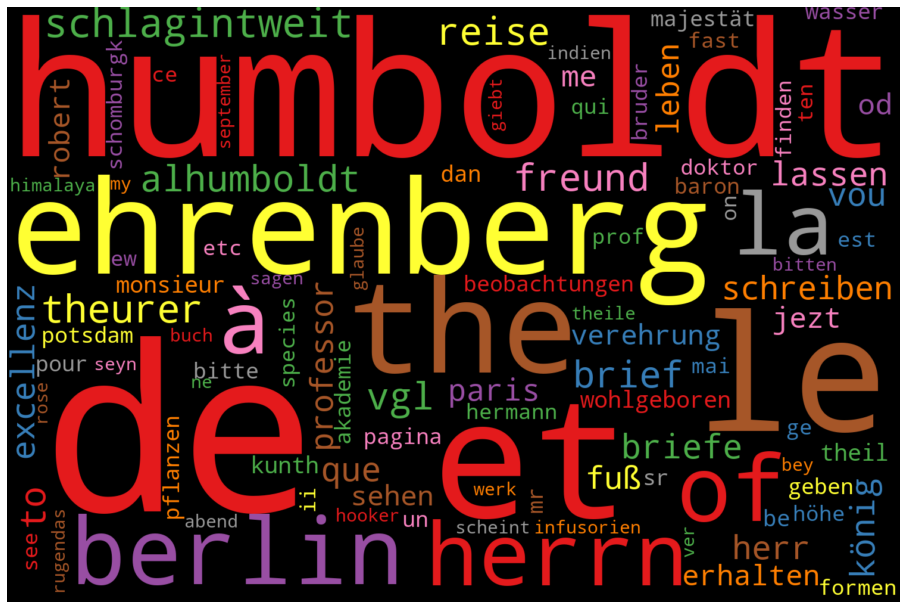

In [7]:
wc.generate(words) 

plt.figure(figsize=(16, 16))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

Bei der Wordcloud fällt allerdins auf, dass einige Briefe auch in französisch oder englischen verfasst wurden. Auch diese Sprachen haben zahlreiche Stoppwörter, wie es sich hier bemerkbar macht. Folglich sollten wir auch diese Stoppwörter herausnehmen. Dies erreichen wir mit dem nachfolgenden Codezellen. Bei den Parametern für die Wordcloud-Generierung haben wir für die Schrift ein anderes Farbset gewählt und zugleich den Hintergrund auf weiß eingestellt. 

Versuchen Sie, die Parameter selbst nochmal zu verändern.

In [8]:
multi_stopwords = stopwords.stopwords(['de', 'en', 'fr'])

In [9]:
wc = WordCloud(width=1500, height=1000,
            random_state=42,
            background_color='white',
            colormap='Set2',
            stopwords=multi_stopwords,
            collocations=False,  # Bigrams werden nicht dargestellt
            max_words=100)

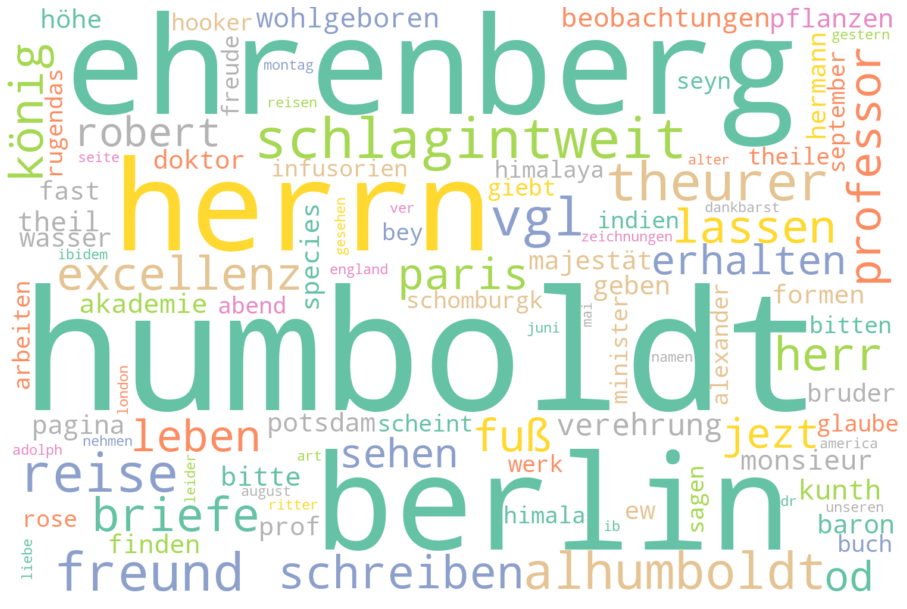

In [10]:
wc.generate(words) 

plt.figure(figsize=(16, 16))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

Mit Hilfe einer for-Schleife und boolescher Maskierung können wir auch die Worthäufigkeiten in den Briefen mit Wordclouds für die einzelnen Jahre - hier für die Jahre zwischen 1850 und 1860 -  darstellen.

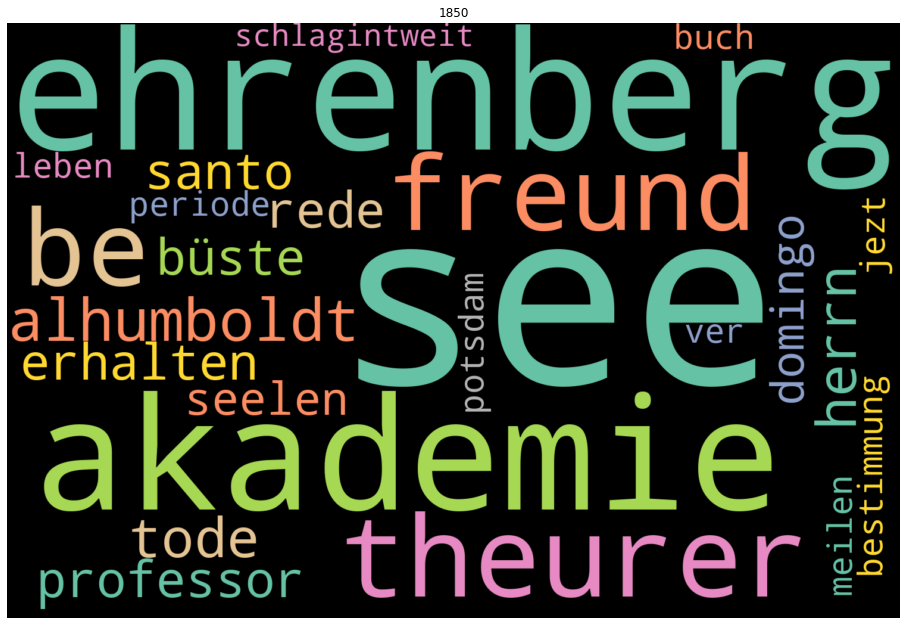

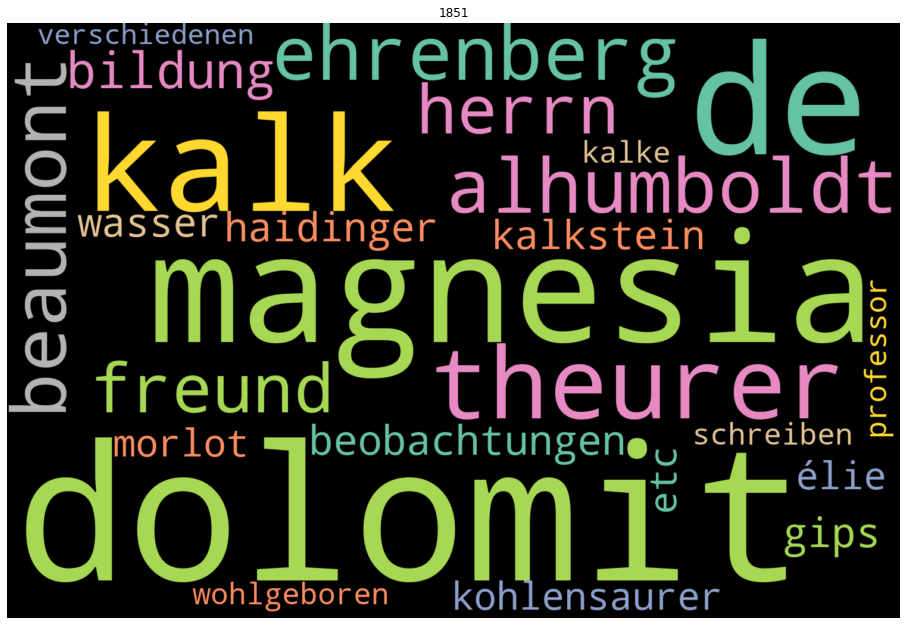

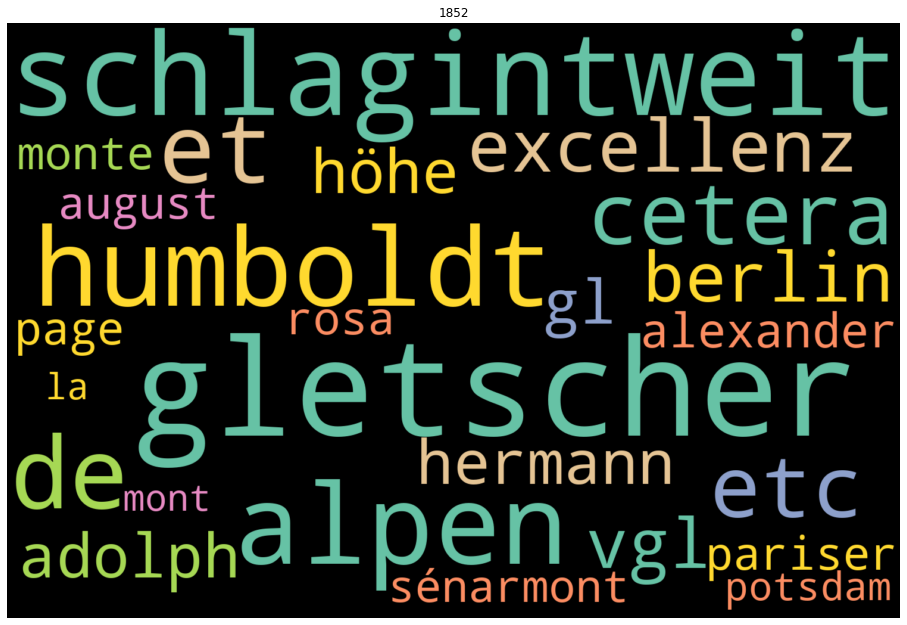

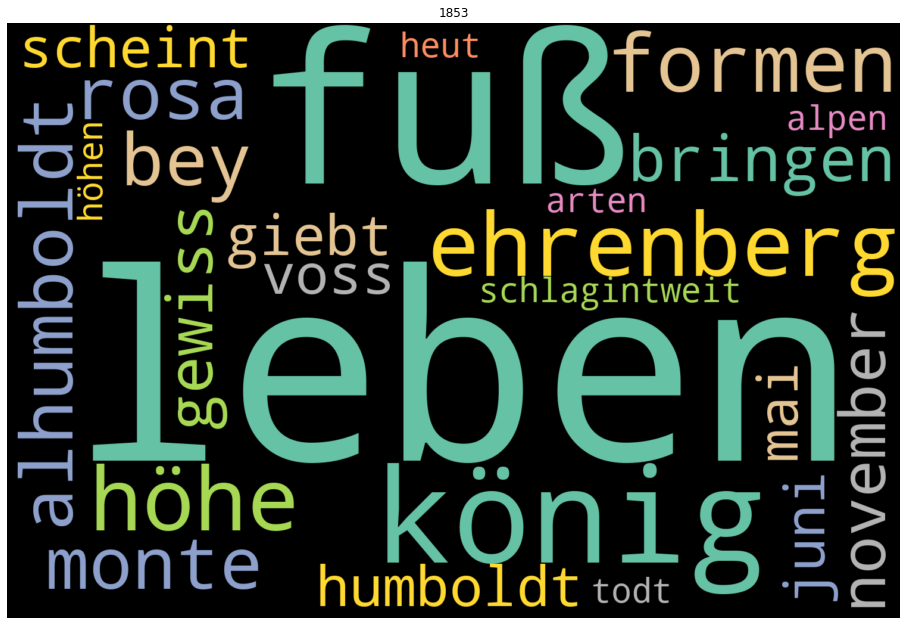

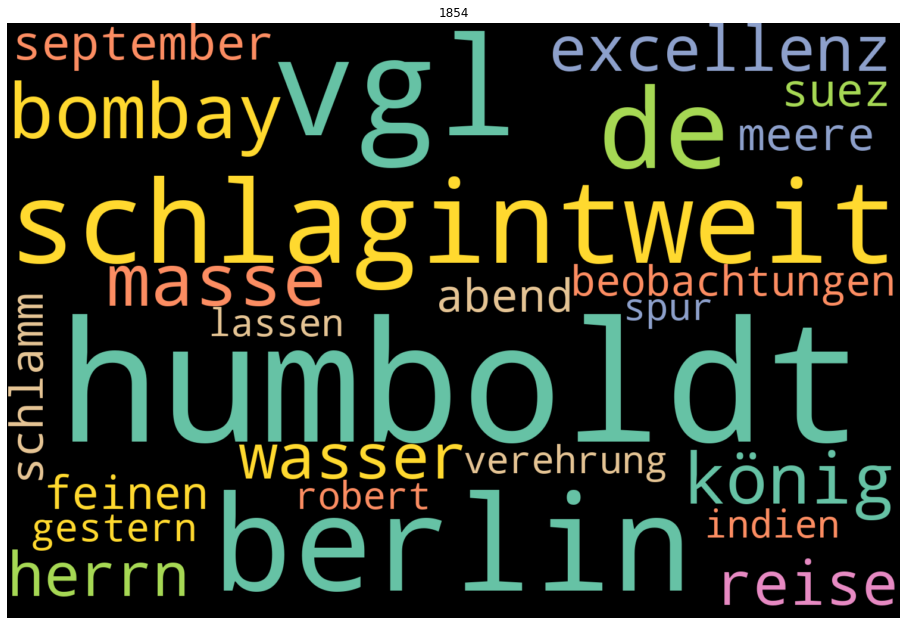

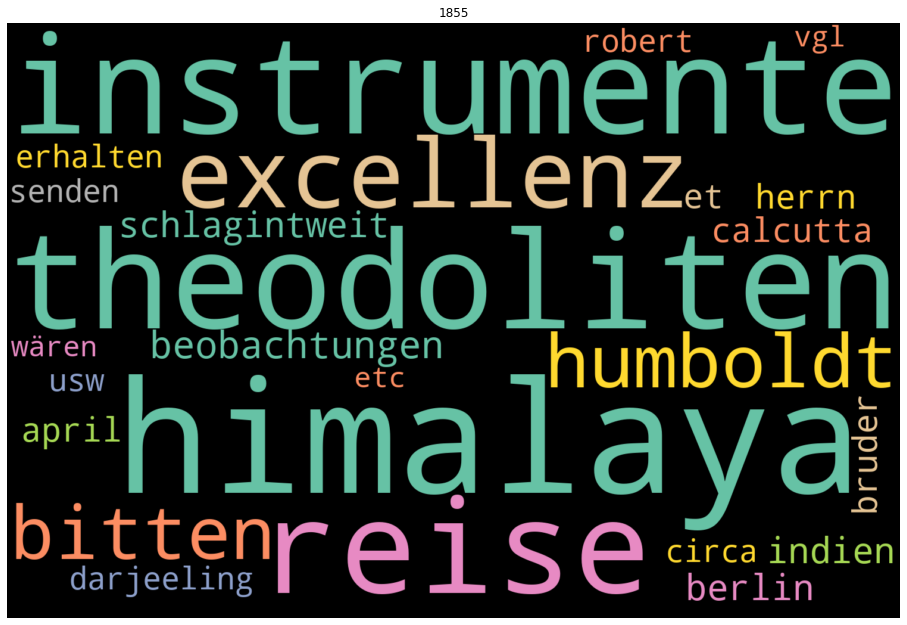

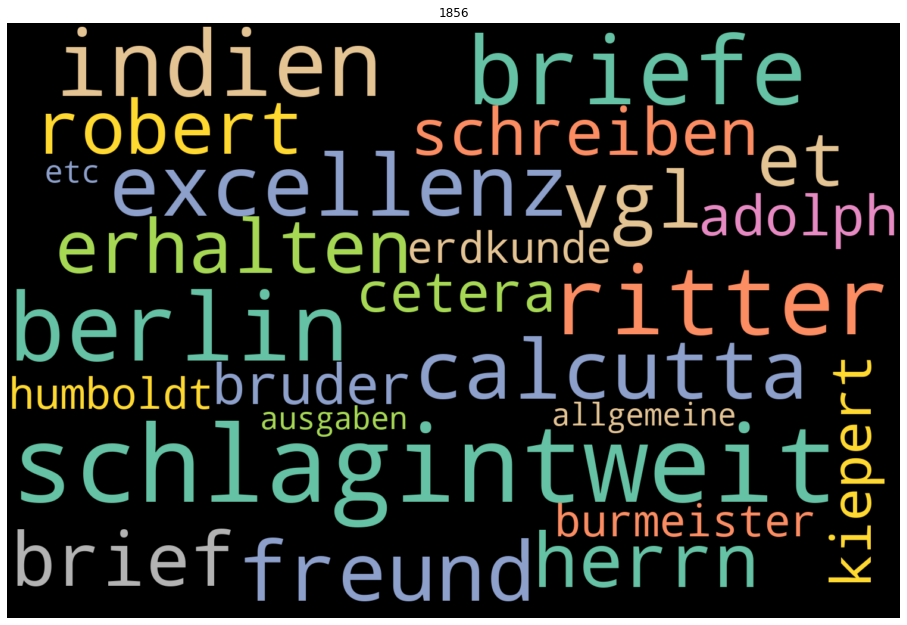

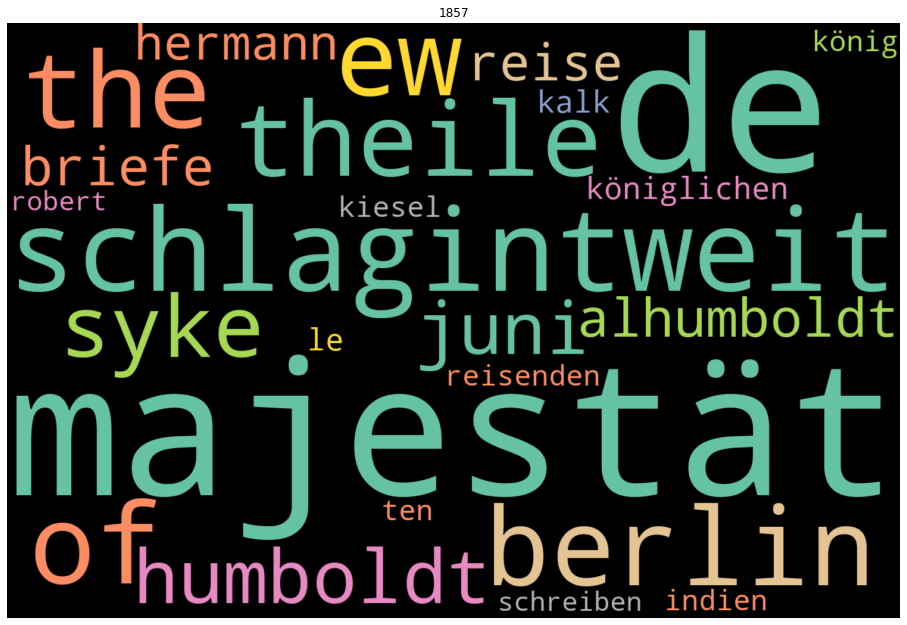

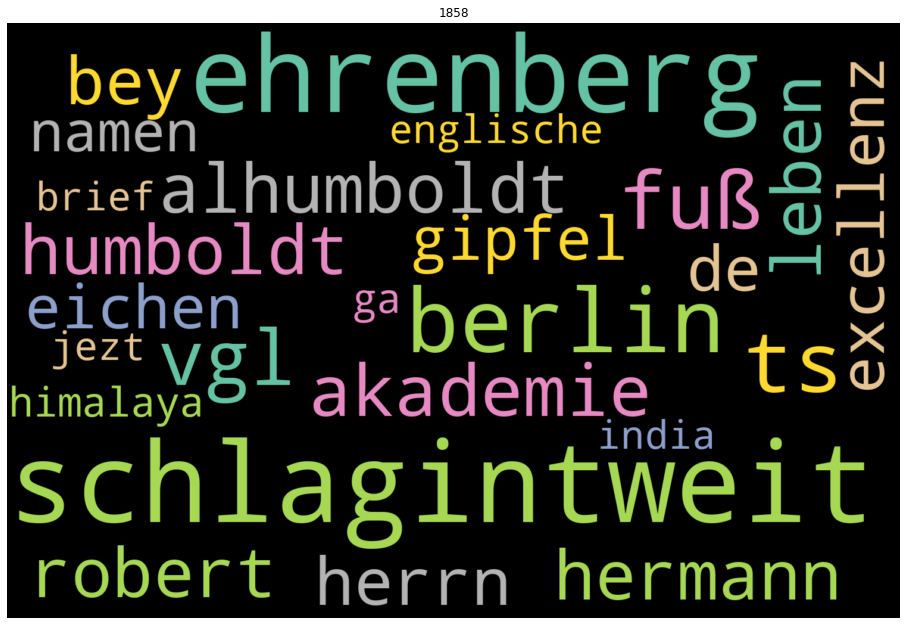

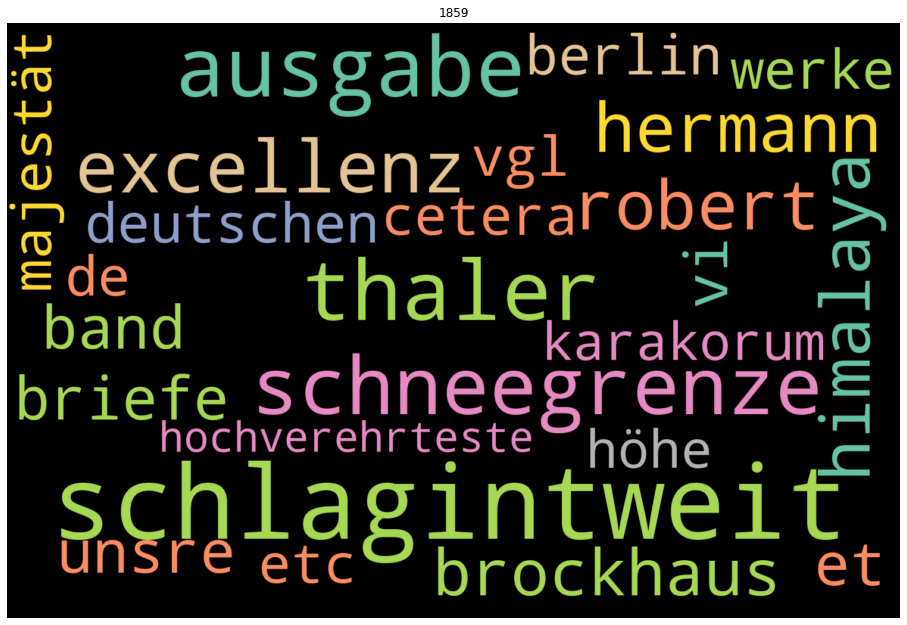

In [12]:
years = list(range(1850,1860))

for year in years:
    mask = df.loc[:, 'date'].dt.to_period('Y') == str(year)

    wc = WordCloud(width=1500, height=1000,
            random_state=42,
            background_color='black',
            colormap='Set2',
            stopwords=stop_words,
            collocations=False,  # Bigrams werden nicht dargestellt
            max_words=25)       


    wc.generate(df.loc[mask, 'text'].str.cat(sep=' ').lower()) # str.cat konkateniert alle Wörter zu einem einzigen String
                                                                     

    plt.figure(figsize=(16, 16))
    plt.imshow(wc, interpolation="bilinear")
    plt.title(year)
    plt.axis('off')
    plt.show()